In [4]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2021-3-25')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,23822000,0,0.0
2015-01-05,42.910000,43.299999,41.431999,42.018002,26842500,0,0.0
2015-01-06,42.012001,42.840000,40.841999,42.256001,31309500,0,0.0
2015-01-07,42.669998,42.956001,41.956001,42.189999,14842000,0,0.0
2015-01-08,42.562000,42.759998,42.001999,42.124001,17212500,0,0.0
...,...,...,...,...,...,...,...
2021-03-18,684.289978,689.229980,652.000000,653.159973,33224800,0,0.0
2021-03-19,646.599976,657.229980,624.619995,654.869995,42827400,0,0.0
2021-03-22,684.590027,699.619995,668.750000,670.000000,39512200,0,0.0


In [5]:
tickerDf.tail(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-22,684.590027,699.619995,668.750000,670.000000,39512200,0,0.0
2021-03-23,675.770020,677.799988,657.510010,662.159973,30491900,0,0.0
2021-03-24,667.909973,668.020020,630.109985,630.270020,33795200,0,0.0


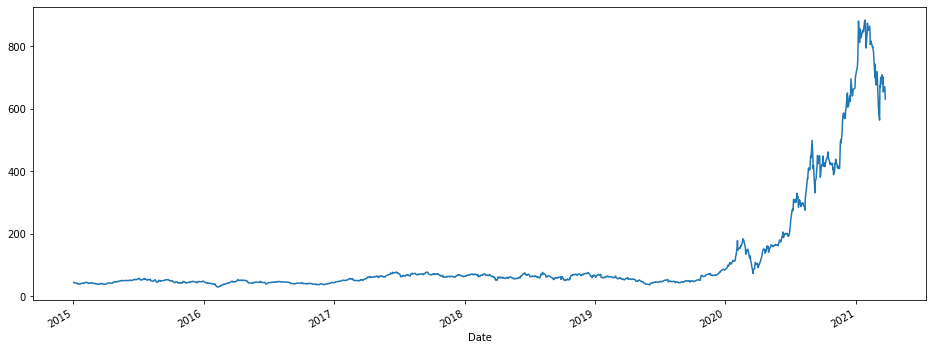

In [6]:
tickerDf['Close'].plot(figsize=(16,6))

In [7]:
tickerDf.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,42.446000,42.770857,41.389428,42.032000,2.387450e+07,0.0,0.0
2015-01-13,41.887429,42.324000,41.036571,41.601715,2.366943e+07,0.0,0.0
2015-01-14,41.066857,41.715428,40.403428,41.104571,2.808614e+07,0.0,0.0


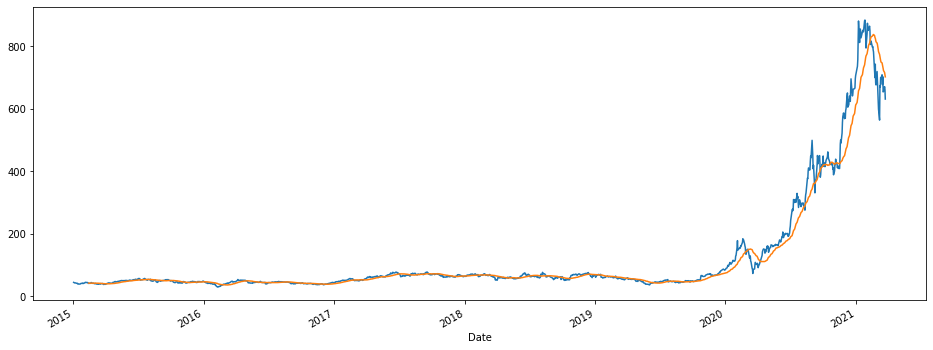

In [8]:
tickerDf['Close'].plot(figsize=(16,6))
tickerDf.rolling(window=30).mean()['Close'].plot()

In [9]:
df1=tickerDf.reset_index()['Close']

df1

0        43.862000
1        42.018002
2        42.256001
3        42.189999
4        42.124001
           ...    
1562    653.159973
1563    654.869995
1564    670.000000
1565    662.159973
1566    630.270020
Name: Close, Length: 1567, dtype: float64

In [10]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)
print(df1.shape)
df1.ndim

[[0.0177069 ]
 [0.01554856]
 [0.01582713]
 ...
 [0.75058404]
 [0.74140751]
 [0.7040812 ]]
(1567, 1)


2

In [11]:
features_set = []
labels = []
for i in range(60, len(df1)):
    features_set.append(df1[i-60:i, 0])
    labels.append(df1[i, 0])
    if i<=61:
        print(features_set)
        print(labels)

[array([0.0177069 , 0.01554856, 0.01582713, 0.01574987, 0.01567262,
       0.01474561, 0.01370389, 0.01418144, 0.01147531, 0.01128335,
       0.01156426, 0.0112974 , 0.0123836 , 0.01356578, 0.01348852,
       0.01471986, 0.01458642, 0.01303906, 0.01440383, 0.01402928,
       0.01574753, 0.01748452, 0.01752899, 0.01810019, 0.01725042,
       0.01727851, 0.01699994, 0.01618295, 0.01386073, 0.01406908,
       0.01420485, 0.0142306 , 0.01592779, 0.0171919 , 0.01490479,
       0.01414867, 0.01406673, 0.01486968, 0.01396842, 0.01256151,
       0.01308354, 0.01375773, 0.01333402, 0.01175388, 0.0110516 ,
       0.01092051, 0.01172111, 0.01109608, 0.01053659, 0.01217993,
       0.01195286, 0.01335275, 0.01216823, 0.01273708, 0.01309992,
       0.01358919, 0.0118522 , 0.01094158, 0.00967512, 0.01097903])]
[0.010557662231771736]
[array([0.0177069 , 0.01554856, 0.01582713, 0.01574987, 0.01567262,
       0.01474561, 0.01370389, 0.01418144, 0.01147531, 0.01128335,
       0.01156426, 0.0112974 , 0.01

In [12]:
features_set, labels = np.array(features_set), np.array(labels)

In [13]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
model = Sequential()

In [16]:

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [17]:
model.add(Dropout(0.2))

In [18]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [19]:
model.add(Dense(units = 1))

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [22]:

model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
48/48 [==============================] - 34s 13ms/step - loss: 0.0219
Epoch 2/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 3/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 4/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 5/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 6/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 7/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 8/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 9/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0019
Epoch 10/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 11/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 12/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 13/100
48/48 [====

In [39]:
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf1 = tickerData.history(period='1d', start='2021-02-25', end='2021-03-25')

#see your data
tickerDf1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-25,726.150024,737.210022,670.580017,682.219971,39023900,0,0
2021-02-26,700.000000,706.700012,659.510010,675.500000,41089200,0,0
2021-03-01,690.109985,719.000000,685.049988,718.429993,27136200,0,0
2021-03-02,718.280029,721.109985,685.000000,686.440002,23732200,0,0
2021-03-03,687.989990,700.700012,651.710022,653.200012,30208000,0,0
2021-03-04,655.799988,668.450012,600.000000,621.440002,65919500,0,0
2021-03-05,626.059998,627.840027,539.489990,597.950012,89396500,0,0
2021-03-08,600.549988,620.130005,558.789978,563.000000,51787000,0,0
2021-03-09,608.179993,678.090027,595.210022,673.580017,67523300,0,0


In [40]:
real_stock_price =tickerDf1.iloc[:, 3:4].values
real_stock_price

array([[682.2199707 ],
       [675.5       ],
       [718.42999268],
       [686.44000244],
       [653.20001221],
       [621.44000244],
       [597.95001221],
       [563.        ],
       [673.58001709],
       [668.05999756],
       [699.59997559],
       [693.72998047],
       [707.94000244],
       [676.88000488],
       [701.80999756],
       [653.15997314],
       [654.86999512],
       [670.        ],
       [662.15997314],
       [630.27001953]])

In [41]:
test_set=tickerDf1['Close']
test_set=pd.DataFrame(test_set)
test_set.shape

(20, 1)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [43]:

dataset_total = pd.concat((tickerDf['Close'], tickerDf1['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(tickerDf1) - 60:].values
inputs = inputs.reshape(-1,1)


In [44]:
inputs = scaler.fit_transform(inputs)

In [45]:
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price1 = scaler.inverse_transform(predicted_stock_price)

In [46]:
predicted_stock_price1=pd.DataFrame(predicted_stock_price1)
predicted_stock_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float32
dtypes: float32(1)
memory usage: 212.0 bytes


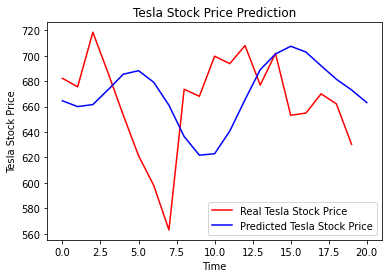

In [47]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()